# Summarize CellProfiler Output

In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import sys
sys.path.append('../..')  # add `src` package location to sys.path
from src.settings import DATA_DIR

Specify the location of the csv files 

In [6]:
input_dir = 'temp'
targ_file = DATA_DIR.joinpath(input_dir).joinpath('Adipocytes_Image.csv') #results for ground truth
pred_file = DATA_DIR.joinpath(input_dir).joinpath('Adipocytes_Image.csv') #results for prediction 

Get the mean absolute error between the target and prediction results

In [10]:
def get_cellprofiler_mean_absolute_error(targ_file, pred_file):
    
    # read the results as dataframes 
    df_targ = pd.read_csv(targ_file) 
    df_pred = pd.read_csv(pred_file)
    df_targ = df_targ.drop(['Metadata_Well', 'ImageNumber'], axis=1) # drop metadata
    df_pred = df_pred.drop(['Metadata_Well', 'ImageNumber'], axis=1) # drop metadata
    n_features = len(df_pred.columns) 
    feature_names = df_targ.keys()
    
    # feature normalization 
    median_targ = df_targ.median()
    df_targ =                                       df_targ/median_targ
    #df_pred = (df_pred - np.arange(n_features)*median_targ)/median_targ
    df_pred = (df_pred - median_targ)/median_targ # Prediction differs by one median for each feature (for testing)

    # mean absolute error for each normalized feature 
    mae_per_feature = mean_absolute_error(df_pred, df_targ, multioutput='raw_values')
    
    # Take weighted average of the mean absolute errors 
    # THIS IS THE METRIC THAT WILL BE USED FOR ASSESSMENT 
    weights = np.ones(mae_per_feature.shape)
    mae = np.average(mae_per_feature, weights=weights)
    return mae, mae_per_feature, feature_names


In [11]:
mae, mae_per_feature, feature_names = get_cellprofiler_mean_absolute_error(targ_file, pred_file)

Plot the mean absolute error per normalized feature

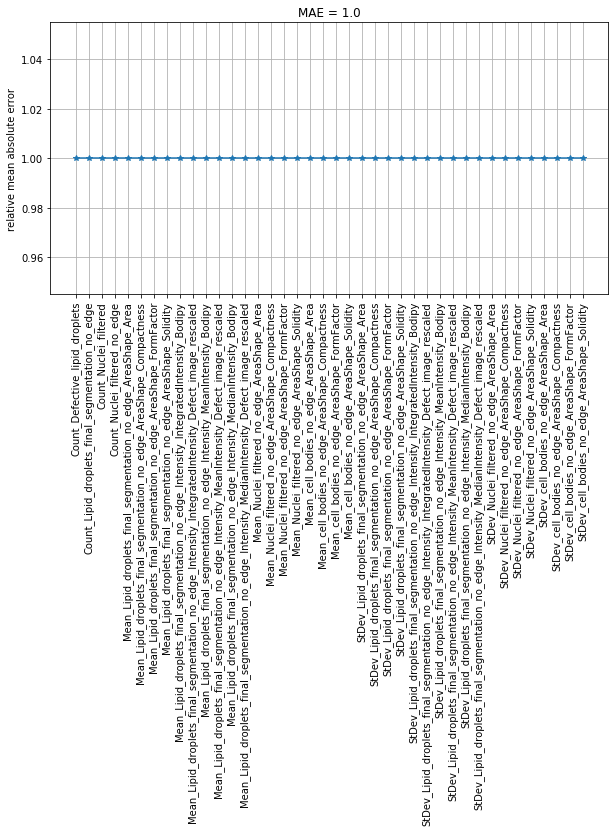

In [12]:
f, ax = plt.subplots(figsize = (10,5)) 
ax.set_title('MAE = ' + str(mae) )
ax.set_ylabel('relative mean absolute error')
ax.plot(mae_per_feature, '-*')
ax.grid(True)
plt.xticks(np.arange(len(mae_per_feature)), feature_names, rotation=90)
plt.show()

In [13]:
import os
os.system('jupyter nbconvert --to html summarize_cellprofiler_output.ipynb')

0